In [27]:
#importing Libraries
import pandas as pd
import numpy as np
from pylab import rcParams
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.preprocessing import scale 
from collections import Counter
import seaborn as sns; sns.set()
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import LeaveOneOut, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB


In [28]:
df=pd.read_csv('J:/Summer 19/AI LAB/Weather Status Prediction/weather_summer.csv').set_index('date')

In [29]:
df

,meantempm,MaxTemp,MinTemp,meantempm_1,meanhumidity,maxhumidity,minhumidity,meanhumidity_1,meanpressurem,maxpressurem,minpressurem,precipm,windspeed,maxdew,mindew
date,,,,,,,,,,,,,,,
01-Apr-19,27,33,21,26,60%,90%,30%,61%,1010%,1011,1008,156.3mm,2mph,24,20
02-Apr-19,26,29,22,25,62%,76%,48%,60%,1011%,1013,1009,150.6mm,3mph,23,21
03-Apr-19,29,34,24,30,61%,87%,35%,59%,1008%,1010,1006,148.40mm,2mph,21,20
04-Apr-19,28,33,23,29,59.50%,75%,44%,58.00%,1007%,1008,1005,156.3mm,3mph,25,21
05-Apr-19,29,34,24,28,61%,85%,37%,60%,1006%,1008,1004,156.3mm,6mph,22,20
06-Apr-19,27,31,23,26,73.50%,91%,56%,71.00%,1008%,1010,1006,154.5mm,3mph,24,21
07-Apr-19,27,32,23,30,71.50%,93%,50%,70.00%,1010%,1012,1008,153.5mm,3mph,24,22
08-Apr-19,28,33,23,31,69.50%,95%,44%,68.00%,1011%,1013,1009,150.6mm,6mph,25,21
09-Apr-19,31,33,28,29,53.50%,67%,40%,52.00%,1010%,1012,1008,151.6mm,3mph,23,20


In [30]:
df.describe()

,meantempm,MaxTemp,MinTemp,meantempm_1,maxdew,mindew
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,29.524590,32.418033,26.475410,28.680328,24.573770,21.909836
std,2.167426,2.292064,2.912535,2.238899,1.360105,1.342282
min,23.000000,26.000000,20.000000,24.000000,21.000000,20.000000
25%,28.000000,31.000000,25.000000,27.000000,24.000000,21.000000
50%,30.000000,33.000000,27.000000,29.000000,25.000000,22.000000
75%,31.000000,34.000000,28.000000,30.000000,26.000000,23.000000
max,37.000000,36.000000,38.000000,33.000000,26.000000,24.000000


In [31]:
def probAttr(data,attr,val):
    Total=data.shape[0]    #Get column length
    cnt = len(data[data[attr] == val]) #Count of Attribute [attr] equal to val
    return cnt,cnt/Total

In [32]:
def train(data,Attr,conceptVals,concept): 
    conceptProbs = {} #P(A)
    countConcept={}
    for cVal in conceptVals: #Get probablity and count of Yes and No
        countConcept[cVal],conceptProbs[cVal] = probAttr(data,concept,cVal)
    
    AttrConcept = {} #P(X/A)
    probability_list = {} #P(X)
    for att in Attr: #Create a tree for attribute
        AttrConcept[att] = {}
        probability_list[att] = {}
        for val in Attr[att]: #Create Tree for Attribute value
            AttrConcept[att][val] = {}
            a,probability_list[att][val] = probAttr(data,att,val) #Get Probablity for att equal to val
            for cVal in conceptVals: #Create Tree to hold yes and no values
                dataTemp = data[data[att]==val] #Calculate att equal to val and concept equal to cVal
                AttrConcept[att][val][cVal] = len(dataTemp[dataTemp[concept] == cVal])/countConcept[cVal]
            
    print("P(A) : ",conceptProbs,"\n")
    print("P(X/A) : ",AttrConcept,"\n")
    print("P(X) : ",probability_list,"\n")
    return conceptProbs,AttrConcept,probability_list



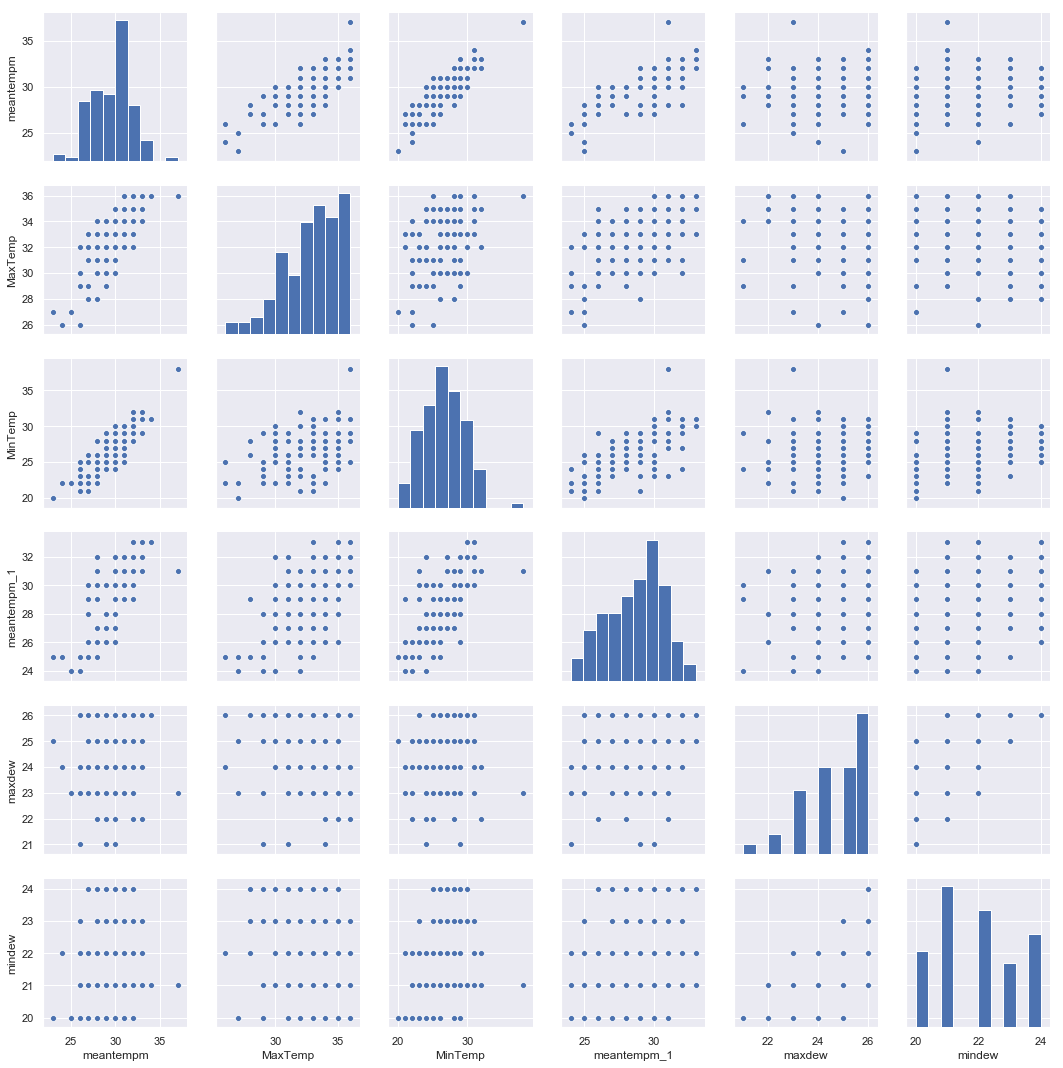

In [33]:
sns.pairplot(df)

In [21]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()



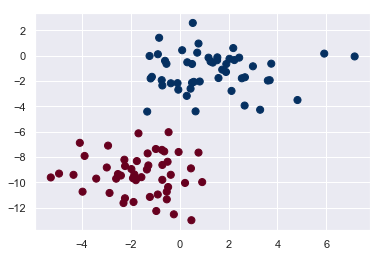

In [13]:
from sklearn.datasets import make_circles
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

In [34]:
def test(examples,Attr,concept_list,conceptProbs,AttrConcept,probability_list):
    misclassification_count=0
    Total = len(examples)    #Get Number of testing set
    for ex in examples:
        px={}  #Dict to hold final value
        for a in Attr:    #Iterrate thorugh the Tree with Attributes (Refer problem to find the tree)
            for x in ex:  #Iterrate thorugh the Tree for given example
                for c in concept_list:   #Iterrate thorugh the Tree using concepts
                    if x in AttrConcept[a]:  #Check if the value of x refering in same sub-tree of P(X/A)
                        if c not in px: #If c not in px multiply P(A) with 1st Itteration (for 1st value of x)
                            px[c] = conceptProbs[c]*AttrConcept[a][x][c]/probability_list[a][x]
                        else:  #multiply px in next Itterations (for next values of x)
                            px[c] = px[c]*AttrConcept[a][x][c]/probability_list[a][x]
        print(px)
        classification = max(px,key=px.get)  #Key of Maximum of px is required Classification
        print("Classification :",classification,"Expected :",ex[-1])
        if(classification!=ex[-1]):
            misclassification_count+=1
    misclassification_rate=misclassification_count*100/Total
    accuracy=100-misclassification_rate
    print("Misclassification Count={}".format(misclassification_count))
    print("Misclassification Rate={}%".format(misclassification_rate))
    print("Accuracy={}%".format(accuracy))

In [35]:
def main():
    import pandas as pd
    from pandas import DataFrame 
    data = DataFrame.from_csv('J:/Summer 19/AI LAB/Weather Status Prediction/weather_summer.csv')
    concept=str(list(data)[-1])
    concept_list = set(data[concept])
    Attr={}
    for a in list(data)[:-1]:    #Get attribute values
        Attr[a] = set(data[a])
    conceptProbs,AttrConcept,probability_list = train(data,Attr,concept_list,concept)

    examples = DataFrame.from_csv('J:/Summer 19/AI LAB/Weather Status Prediction/weather_summer.csv')
    test(examples.values,Attr,concept_list,conceptProbs,AttrConcept,probability_list)

In [64]:
main()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  after removing the cwd from sys.path.


P(A) :  {20: 0.1557377049180328, 21: 0.28688524590163933, 22: 0.23770491803278687, 23: 0.13114754098360656, 24: 0.1885245901639344} 

P(X/A) :  {'meantempm': {32: {20: 0.05263157894736842, 21: 0.08571428571428572, 22: 0.2413793103448276, 23: 0.125, 24: 0.13043478260869565}, 33: {20: 0.0, 21: 0.02857142857142857, 22: 0.06896551724137931, 23: 0.125, 24: 0.0}, 34: {20: 0.0, 21: 0.02857142857142857, 22: 0.0, 23: 0.0, 24: 0.0}, 37: {20: 0.0, 21: 0.02857142857142857, 22: 0.0, 23: 0.0, 24: 0.0}, 23: {20: 0.05263157894736842, 21: 0.0, 22: 0.0, 23: 0.0, 24: 0.0}, 24: {20: 0.0, 21: 0.0, 22: 0.034482758620689655, 23: 0.0, 24: 0.0}, 25: {20: 0.05263157894736842, 21: 0.0, 22: 0.0, 23: 0.0, 24: 0.0}, 26: {20: 0.05263157894736842, 21: 0.05714285714285714, 22: 0.06896551724137931, 23: 0.0625, 24: 0.0}, 27: {20: 0.21052631578947367, 21: 0.08571428571428572, 22: 0.10344827586206896, 23: 0.0, 24: 0.043478260869565216}, 28: {20: 0.10526315789473684, 21: 0.2, 22: 0.13793103448275862, 23: 0.125, 24: 0.21739

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  if sys.path[0] == '':


In [37]:
df.tail()

,meantempm,MaxTemp,MinTemp,meantempm_1,meanhumidity,maxhumidity,minhumidity,meanhumidity_1,meanpressurem,maxpressurem,minpressurem,precipm,windspeed,maxdew,mindew
date,,,,,,,,,,,,,,,
27-Jul-19,28,30,26,27,86%,97%,74%,87.00%,999%,1001,998,376.4mm,6mph,26,24
28-Jul-19,30,32,27,31,76%,89%,63%,77.00%,1002%,1003,1001,373.1mm,6mph,26,24
29-Jul-19,30,32,28,30,80%,83%,76%,82.00%,1002%,1004,1001,373.1mm,2mph,26,24
30-Jul-19,30,31,28,31,80%,90%,69%,80.00%,1003%,1004,1002,376.4mm,3mph,26,24
31-Jul-19,28,28,28,29,89%,89%,89%,89.00%,1004%,1004,1004,376.4mm,2mph,26,24


In [38]:
df.head()

,meantempm,MaxTemp,MinTemp,meantempm_1,meanhumidity,maxhumidity,minhumidity,meanhumidity_1,meanpressurem,maxpressurem,minpressurem,precipm,windspeed,maxdew,mindew
date,,,,,,,,,,,,,,,
01-Apr-19,27,33,21,26,60%,90%,30%,61%,1010%,1011,1008,156.3mm,2mph,24,20
02-Apr-19,26,29,22,25,62%,76%,48%,60%,1011%,1013,1009,150.6mm,3mph,23,21
03-Apr-19,29,34,24,30,61%,87%,35%,59%,1008%,1010,1006,148.40mm,2mph,21,20
04-Apr-19,28,33,23,29,59.50%,75%,44%,58.00%,1007%,1008,1005,156.3mm,3mph,25,21
05-Apr-19,29,34,24,28,61%,85%,37%,60%,1006%,1008,1004,156.3mm,6mph,22,20


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


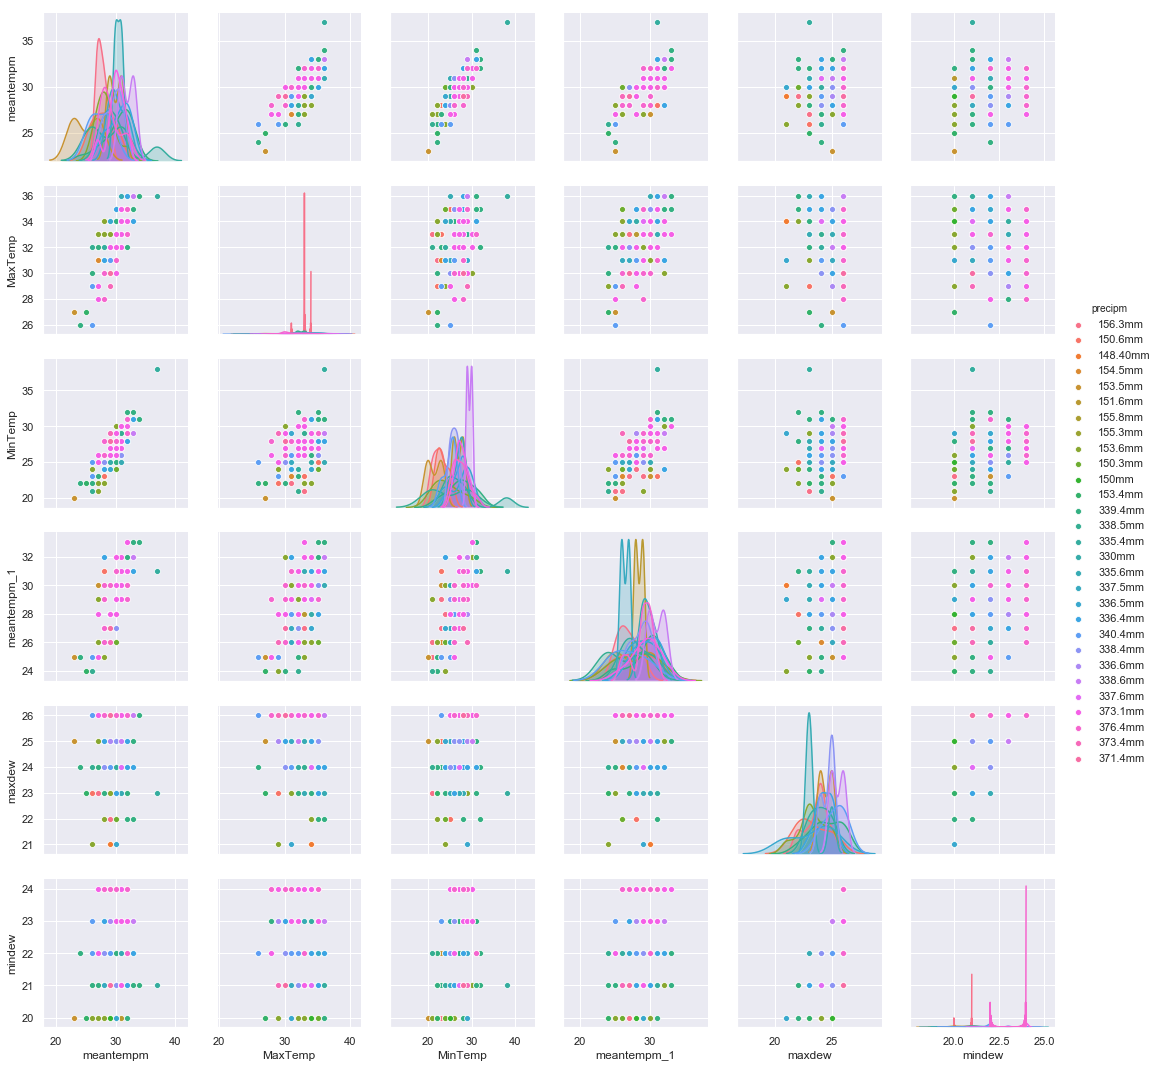

In [39]:
sns.pairplot(df,hue='precipm')

In [41]:
X = df.drop('precipm',axis=1)



In [42]:
X.head()

,meantempm,MaxTemp,MinTemp,meantempm_1,meanhumidity,maxhumidity,minhumidity,meanhumidity_1,meanpressurem,maxpressurem,minpressurem,windspeed,maxdew,mindew
date,,,,,,,,,,,,,,
01-Apr-19,27,33,21,26,60%,90%,30%,61%,1010%,1011,1008,2mph,24,20
02-Apr-19,26,29,22,25,62%,76%,48%,60%,1011%,1013,1009,3mph,23,21
03-Apr-19,29,34,24,30,61%,87%,35%,59%,1008%,1010,1006,2mph,21,20
04-Apr-19,28,33,23,29,59.50%,75%,44%,58.00%,1007%,1008,1005,3mph,25,21
05-Apr-19,29,34,24,28,61%,85%,37%,60%,1006%,1008,1004,6mph,22,20


In [44]:
y = df['precipm']

In [45]:
y.head()

date
01-Apr-19     156.3mm
02-Apr-19     150.6mm
03-Apr-19    148.40mm
04-Apr-19     156.3mm
05-Apr-19     156.3mm
Name: precipm, dtype: object

In [71]:
df.shape

(122, 15)

In [72]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()

In [73]:
print(count_vector)


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)


In [75]:
count_vector.fit(df)
names = count_vector.get_feature_names()
names

['maxdew',
 'maxhumidity',
 'maxpressurem',
 'maxtemp',
 'meanhumidity',
 'meanhumidity_1',
 'meanpressurem',
 'meantempm',
 'meantempm_1',
 'mindew',
 'minhumidity',
 'minpressurem',
 'mintemp',
 'precipm',
 'windspeed']

In [76]:
doc_array = count_vector.transform(df).toarray()
doc_array

array([[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]], dtype=int64)

In [77]:
frequency_matrix = pd.DataFrame(data=doc_array, columns=names)
frequency_matrix

,maxdew,maxhumidity,maxpressurem,maxtemp,meanhumidity,meanhumidity_1,meanpressurem,meantempm,meantempm_1,mindew,minhumidity,minpressurem,mintemp,precipm,windspeed
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
7,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [104]:
X_train, X_test, y_train, y_test = train_test_split(df['precipm'], df['windspeed'], random_state=1)

In [105]:
print('Number of rows in the total set: {}'.format(df.shape[0]))

Number of rows in the total set: 122


In [106]:
print('Number of rows in the training set: {}'.format(X_train.shape[0]))

Number of rows in the training set: 91


In [107]:
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

Number of rows in the test set: 31


In [108]:
# Instantiate the CountVectorizer method
count_vector = CountVectorizer()

In [109]:
# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(X_train)

In [110]:
# Transform testing data and return the matrix. No fitting the testing data into the CountVectorizer()
testing_data = count_vector.transform(X_test)

In [111]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [112]:
predictions = naive_bayes.predict(testing_data)

In [113]:
#    Accuracy: Measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).
#Precision: Tells us what proportion of messages we classified as spam, actually were spam. It is a ratio of true positives(words classified as spam, and which are actually spam) to all positives(all words classified as spam, irrespective of whether that was the correct classification).

In [118]:
df.head()

,meantempm,MaxTemp,MinTemp,meantempm_1,meanhumidity,maxhumidity,minhumidity,meanhumidity_1,meanpressurem,maxpressurem,minpressurem,precipm,windspeed,maxdew,mindew
date,,,,,,,,,,,,,,,
01-Apr-19,27,33,21,26,60%,90%,30%,61%,1010%,1011,1008,156.3mm,2mph,24,20
02-Apr-19,26,29,22,25,62%,76%,48%,60%,1011%,1013,1009,150.6mm,3mph,23,21
03-Apr-19,29,34,24,30,61%,87%,35%,59%,1008%,1010,1006,148.40mm,2mph,21,20
04-Apr-19,28,33,23,29,59.50%,75%,44%,58.00%,1007%,1008,1005,156.3mm,3mph,25,21
05-Apr-19,29,34,24,28,61%,85%,37%,60%,1006%,1008,1004,156.3mm,6mph,22,20


In [119]:
Precision = [156.3/(156.3 + 110)]

In [120]:
Recall=[2/(2+6)]

In [121]:
print('Accuracy score: ', format(accuracy_score(y_test, predictions)))

Accuracy score:  0.2903225806451613
